<a href="https://colab.research.google.com/github/ashutosh100kumarsingh-blip/AML_LAB/blob/main/Exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount the drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AML_LAB/data.csv")

In [ ]:
df.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN


#TEAM NAME NORMALIZATION

In [ ]:
# Standardize column names (safety step)
df.columns = df.columns.str.strip().str.lower()

# Team Name Normalization
df['team1'] = df['team1'].astype(str).str.lower().str.strip()
df['team2'] = df['team2'].astype(str).str.lower().str.strip()

# Verify unique team names after cleaning
unique_teams = pd.unique(df[['team1', 'team2']].values.ravel())

# Display results
print("Unique team names after cleaning:")
print(unique_teams)
print("\nTotal number of unique teams:", len(unique_teams))

# Preview cleaned data
display(df[['team1', 'team2']].head())


Unique team names after cleaning:
['kolkata knight riders' 'royal challengers bangalore'
 'chennai super kings' 'kings xi punjab' 'rajasthan royals'
 'delhi daredevils' 'mumbai indians' 'deccan chargers'
 'kochi tuskers kerala' 'pune warriors' 'sunrisers hyderabad'
 'rising pune supergiants' 'gujarat lions']

Total number of unique teams: 13


,team1,team2
0,kolkata knight riders,royal challengers bangalore
1,chennai super kings,kings xi punjab
2,rajasthan royals,delhi daredevils
3,mumbai indians,royal challengers bangalore
4,deccan chargers,kolkata knight riders


In [ ]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
df.shape

(577, 18)

In [ ]:
print(df['team1'] , df['team1'])

0      kolkata knight riders
1        chennai super kings
2           rajasthan royals
3             mumbai indians
4            deccan chargers
               ...          
572         delhi daredevils
573            gujarat lions
574      sunrisers hyderabad
575            gujarat lions
576      sunrisers hyderabad
Name: team1, Length: 577, dtype: object 0      kolkata knight riders
1        chennai super kings
2           rajasthan royals
3             mumbai indians
4            deccan chargers
               ...          
572         delhi daredevils
573            gujarat lions
574      sunrisers hyderabad
575            gujarat lions
576      sunrisers hyderabad
Name: team1, Length: 577, dtype: object


In [ ]:
df['team1'] = df['team1'].astype(str).str.lower().str.strip()
df['team2'] = df['team2'].astype(str).str.lower().str.strip()
print(df['team1'] , df['team1'])
print(df['team2'] , df['team2'])

0      kolkata knight riders
1        chennai super kings
2           rajasthan royals
3             mumbai indians
4            deccan chargers
               ...          
572         delhi daredevils
573            gujarat lions
574      sunrisers hyderabad
575            gujarat lions
576      sunrisers hyderabad
Name: team1, Length: 577, dtype: object 0      kolkata knight riders
1        chennai super kings
2           rajasthan royals
3             mumbai indians
4            deccan chargers
               ...          
572         delhi daredevils
573            gujarat lions
574      sunrisers hyderabad
575            gujarat lions
576      sunrisers hyderabad
Name: team1, Length: 577, dtype: object
0      royal challengers bangalore
1                  kings xi punjab
2                 delhi daredevils
3      royal challengers bangalore
4            kolkata knight riders
                  ...             
572    royal challengers bangalore
573    royal challengers bangalore
57

In [ ]:
print(df['city'].isnull().sum()) #should've been 7 but i already did the code to fill missing with unknown

0


In [ ]:
df['city'] = df['city'].str.title()
print(df['city'].head)

<bound method NDFrame.head of 0       Bangalore
1      Chandigarh
2           Delhi
3          Mumbai
4         Kolkata
          ...    
572        Raipur
573     Bangalore
574         Delhi
575         Delhi
576     Bangalore
Name: city, Length: 577, dtype: object>


In [ ]:
df['city'].value_counts()

,count
city,
Mumbai,77
Bangalore,58
Kolkata,54
Delhi,53
Chennai,48
Chandigarh,42
Hyderabad,41
Jaipur,33
Pune,25


In [ ]:
# Standardize column names (safety)
df.columns = df.columns.str.strip().str.lower()

# City Name Standardization
df['city'] = df['city'].fillna('unknown')      # Step 1
df['city'] = df['city'].str.title()             # Step 2

# Count matches played in each city
city_match_count = df['city'].value_counts()

# Display results
print("Matches played in each city:\n")
print(city_match_count)

display(city_match_count.reset_index().rename(
    columns={'index': 'City', 'city': 'Matches Played'}
))


Matches played in each city:

city
Mumbai            77
Bangalore         58
Kolkata           54
Delhi             53
Chennai           48
Chandigarh        42
Hyderabad         41
Jaipur            33
Pune              25
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Dharamsala         9
Johannesburg       8
Unknown            7
Abu Dhabi          7
Cape Town          7
Port Elizabeth     7
Ranchi             7
Cuttack            7
Raipur             6
Sharjah            6
Rajkot             5
Kochi              5
Kimberley          3
East London        3
Nagpur             3
Bloemfontein       2
Indore             2
Kanpur             2
Name: count, dtype: int64


,Matches Played,count
0,Mumbai,77
1,Bangalore,58
2,Kolkata,54
3,Delhi,53
4,Chennai,48
5,Chandigarh,42
6,Hyderabad,41
7,Jaipur,33
8,Pune,25
9,Durban,15


#TOSS DECISION Text Analysis

In [ ]:
df['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [ ]:
df['toss_decision'].value_counts()

,count
toss_decision,
field,315
bat,262


<Axes: xlabel='toss_decision'>

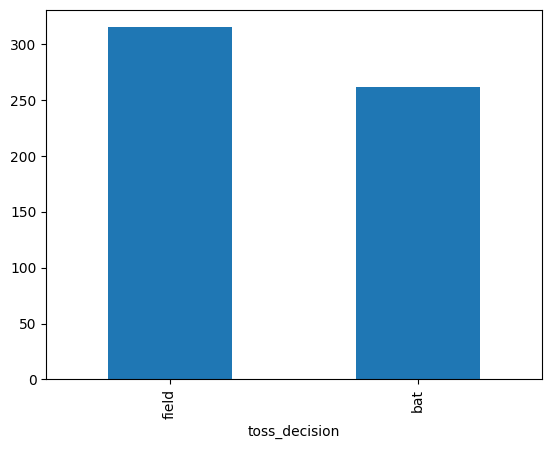

In [ ]:
bar = df['toss_decision'].value_counts()
bar.plot(kind='bar')

In [ ]:
df = df[df['result'] == "normal"]
df['result'].value_counts()

,count
result,
normal,568


In [ ]:
df['winner'].value_counts()

,count
winner,
Mumbai Indians,80
Chennai Super Kings,79
Royal Challengers Bangalore,69
Kolkata Knight Riders,68
Rajasthan Royals,61
Kings XI Punjab,61
Delhi Daredevils,56
Sunrisers Hyderabad,33
Deccan Chargers,29


#Winner Name Extraction

In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AML_LAB/data.csv')

df['winner'] = df['winner'].str.lower().str.strip()

df_clean = df[(df['winner'] != 'no result') & (df['winner'] != 'tie')]

print("Rows after removing tie & no result:", len(df_clean))


Rows after removing tie & no result: 577


In [7]:
df_clean['winner'].value_counts()


,count
winner,
mumbai indians,80
chennai super kings,79
royal challengers bangalore,70
kolkata knight riders,68
rajasthan royals,63
kings xi punjab,63
delhi daredevils,56
sunrisers hyderabad,34
deccan chargers,29


#Player of the Match Text Frequency

In [8]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AML_LAB/data.csv')

# remove null values from player_of_match column
pom = df['player_of_match'].dropna()

print("Non-null player names:", len(pom))


Non-null player names: 574


In [9]:
top10 = pom.value_counts().head(10)

print(top10)


player_of_match
CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
SK Raina          13
MEK Hussey        12
MS Dhoni          12
G Gambhir         12
AM Rahane         12
Name: count, dtype: int64


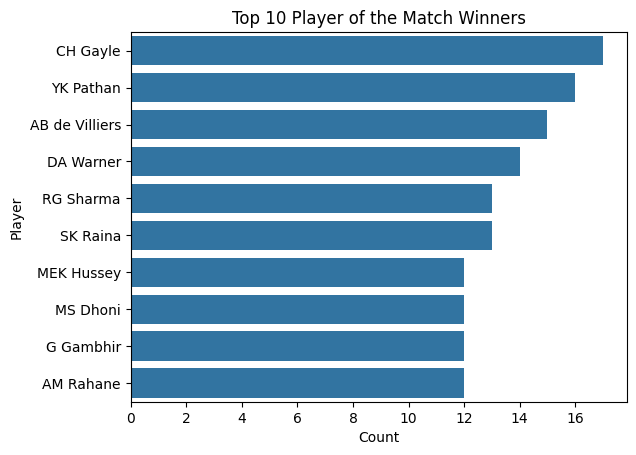

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top10.values, y=top10.index)
plt.xlabel("Count")
plt.ylabel("Player")
plt.title("Top 10 Player of the Match Winners")
plt.show()


#Venue Tokenization

In [11]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AML_LAB/data.csv')

venue_counts = df['venue'].value_counts().head(10)

print(venue_counts)


venue
M Chinnaswamy Stadium                         58
Eden Gardens                                  54
Feroz Shah Kotla                              53
Wankhede Stadium                              49
MA Chidambaram Stadium, Chepauk               48
Rajiv Gandhi International Stadium, Uppal     41
Punjab Cricket Association Stadium, Mohali    35
Sawai Mansingh Stadium                        33
Dr DY Patil Sports Academy                    17
Subrata Roy Sahara Stadium                    17
Name: count, dtype: int64


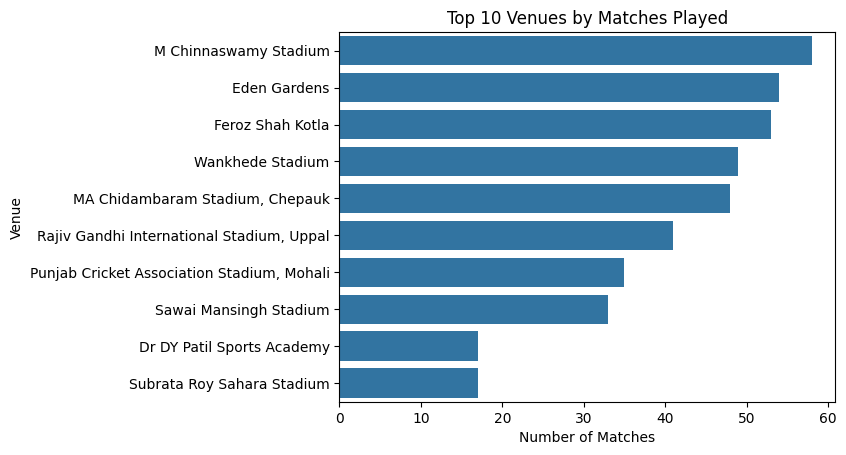

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=venue_counts.values, y=venue_counts.index)
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.title("Top 10 Venues by Matches Played")
plt.show()


# Umpire Name Cleaning


In [13]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AML_LAB/data.csv')

df['umpire1'] = df['umpire1'].fillna("Not Assigned")
df['umpire2'] = df['umpire2'].fillna("Not Assigned")
df['umpire3'] = df['umpire3'].fillna("Not Assigned")

print("Missing values replaced")


Missing values replaced


In [14]:
for i in df.index:
    names = [df.at[i,'umpire1'], df.at[i,'umpire2'], df.at[i,'umpire3']]
    unique_names = list(dict.fromkeys(names))  # removes duplicates, keeps order

    while len(unique_names) < 3:
        unique_names.append("Not Assigned")

    df.at[i,'umpire1'], df.at[i,'umpire2'], df.at[i,'umpire3'] = unique_names


In [15]:
all_umpires = pd.concat([df['umpire1'], df['umpire2'], df['umpire3']])

print(all_umpires.value_counts().head(1))


Not Assigned    577
Name: count, dtype: int64


#Create a new text column match_summary by combining

In [16]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AML_LAB/data.csv')

df['match_summary'] = (
    df['team1'] + " vs " +
    df['team2'] + " – " +
    df['winner'] + " won in " +
    df['season'].astype(str)
)

print("match_summary column created")


match_summary column created


In [17]:
df['match_summary'].head(10)


,match_summary
0,Kolkata Knight Riders vs Royal Challengers Ban...
1,Chennai Super Kings vs Kings XI Punjab – Chenn...
2,Rajasthan Royals vs Delhi Daredevils – Delhi D...
3,Mumbai Indians vs Royal Challengers Bangalore ...
4,Deccan Chargers vs Kolkata Knight Riders – Kol...
5,Kings XI Punjab vs Rajasthan Royals – Rajastha...
6,Deccan Chargers vs Delhi Daredevils – Delhi Da...
7,Chennai Super Kings vs Mumbai Indians – Chenna...
8,Deccan Chargers vs Rajasthan Royals – Rajastha...
9,Kings XI Punjab vs Mumbai Indians – Kings XI P...


#Result Type Text Analysis

In [18]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AML_LAB/data.csv')

# clean text (safe step)
df['result'] = df['result'].str.lower().str.strip()

print("Different result types:")
print(df['result'].unique())


Different result types:
['normal' 'tie' 'no result']


In [19]:
print(df['result'].value_counts())


result
normal       568
tie            6
no result      3
Name: count, dtype: int64


#Toss Winner vs Match Winner (Text Matching)

In [20]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AML_LAB/data.csv')

# clean text columns (safe step)
df['toss_winner'] = df['toss_winner'].str.lower().str.strip()
df['winner'] = df['winner'].str.lower().str.strip()

# create boolean column
df['toss_winner_won_match'] = df['toss_winner'] == df['winner']

print(df[['toss_winner', 'winner', 'toss_winner_won_match']].head())


                   toss_winner                       winner  \
0  royal challengers bangalore        kolkata knight riders   
1          chennai super kings          chennai super kings   
2             rajasthan royals             delhi daredevils   
3               mumbai indians  royal challengers bangalore   
4              deccan chargers        kolkata knight riders   

   toss_winner_won_match  
0                  False  
1                   True  
2                  False  
3                  False  
4                  False  


In [21]:
result_counts = df['toss_winner_won_match'].value_counts()
print(result_counts)


toss_winner_won_match
True     291
False    286
Name: count, dtype: int64


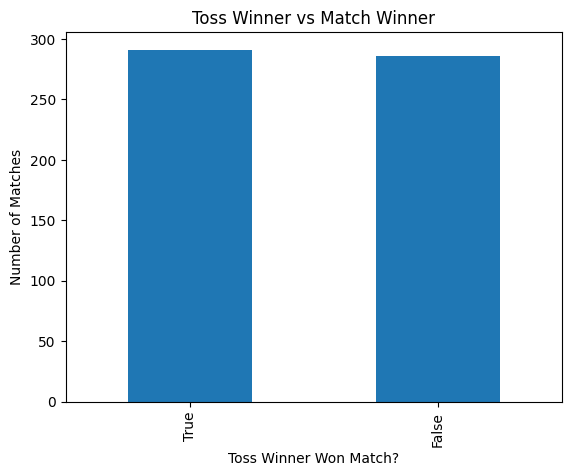

In [22]:
import matplotlib.pyplot as plt

result_counts.plot(kind='bar')
plt.xlabel("Toss Winner Won Match?")
plt.ylabel("Number of Matches")
plt.title("Toss Winner vs Match Winner")
plt.show()


# Winner points Graph

In [23]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AML_LAB/data.csv')

win_counts = df['winner'].value_counts()

print(win_counts)


winner
Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings XI Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64


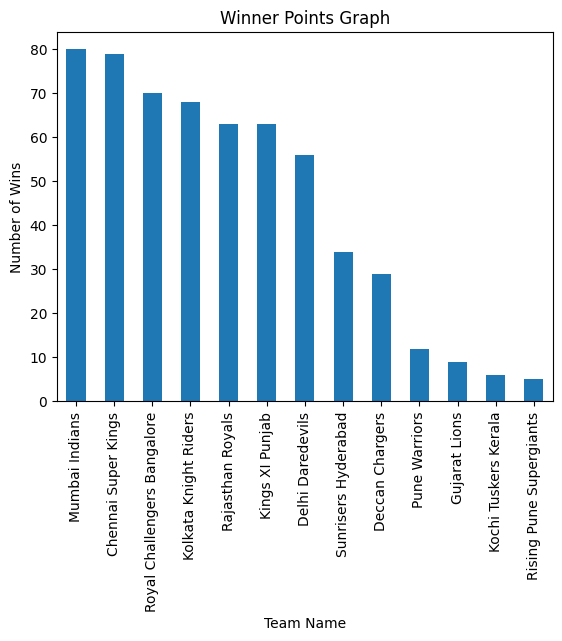

In [24]:
import matplotlib.pyplot as plt

win_counts.plot(kind='bar')

plt.xlabel("Team Name")
plt.ylabel("Number of Wins")
plt.title("Winner Points Graph")
plt.xticks(rotation=90)
plt.show()
